# Basic Classification Machine Learning Example

For this we will grab a synthetic data set and then a toy dataset to perform some classification. Then we will perform it with an unbalanced dataset as well 

## Load Libraries and Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import make_classification

In [19]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=5, n_redundant=3, n_repeated=2, random_state=101)

In [20]:
df = pd.DataFrame(X)
df['target'] = y

After creating our dataset we will plot a couple of projections to have an idea if we need to tweak our data

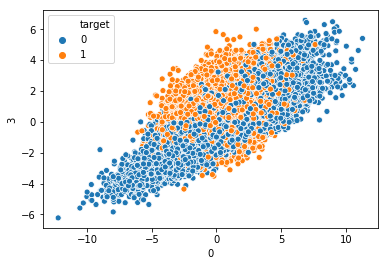

In [21]:
sns.scatterplot(data=df, x=0, y=3, hue='target')

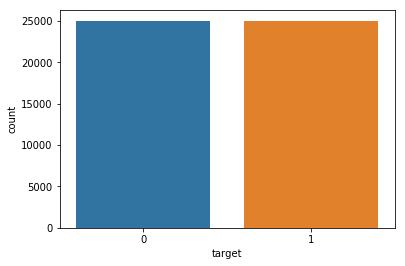

In [22]:
sns.countplot(df['target'])

We have a balanced synthetic dataset. This means there are no nulls, not outliers and no imbalance in the target variable. We need to find if we have redundant or irrelevant features

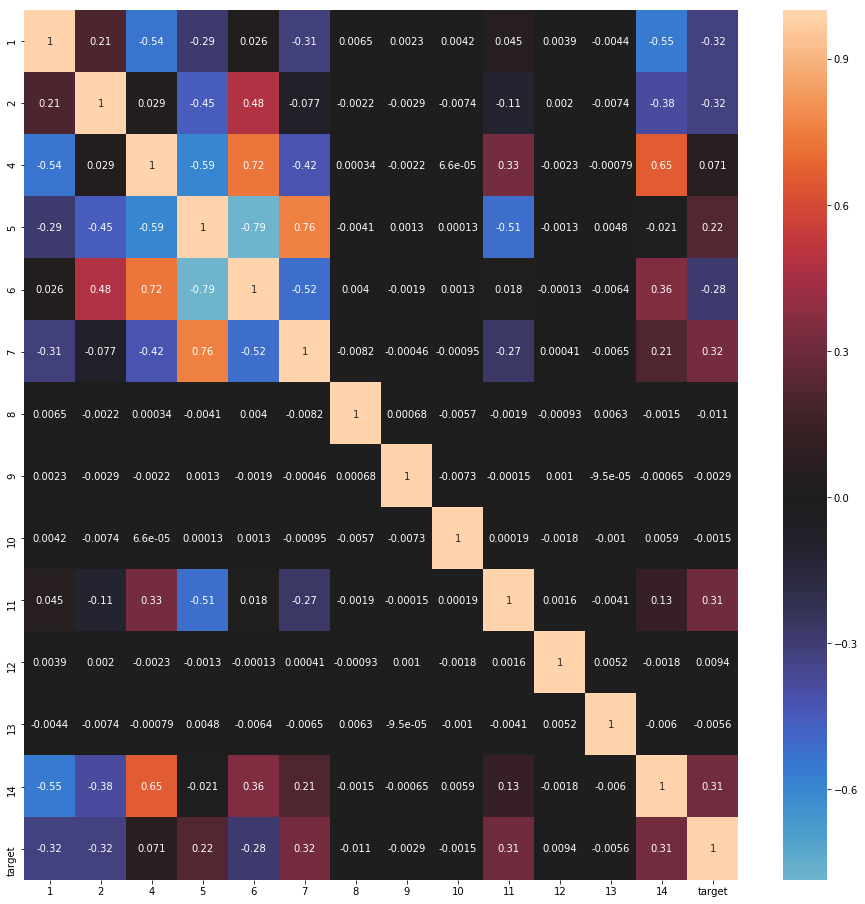

In [25]:
plt.subplots(figsize=(16,16))
sns.heatmap(df.corr(), annot=True, center=0)

we can see that features 4, 0  are a repeated class as they have a 1 correlation, same thing happens with 14 and 3. we can see their correlations against the target variable are also the same. So we can drop those 2 variables right away. 

In [24]:
df.drop([0, 3], axis=1, inplace=True)

We can also see a lot of features that are not correlated with the target variable. We could try to remove these. but an algorithm like Random Forest will be able to auto select the most important features

### Modelling

### Data Prep

In [26]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

In [27]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

We start from the simplest model and we increase complexity as we go ahead

As the data is perfectly balanced (as all things should be), we can use the accuracy as a metric to evaluate our models

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
log_model = LogisticRegression(solver='lbfgs')
cross_val_score(log_model, X_train, y_train, cv=5)

array([0.78580158, 0.79055556, 0.79188889, 0.788     , 0.79475497])

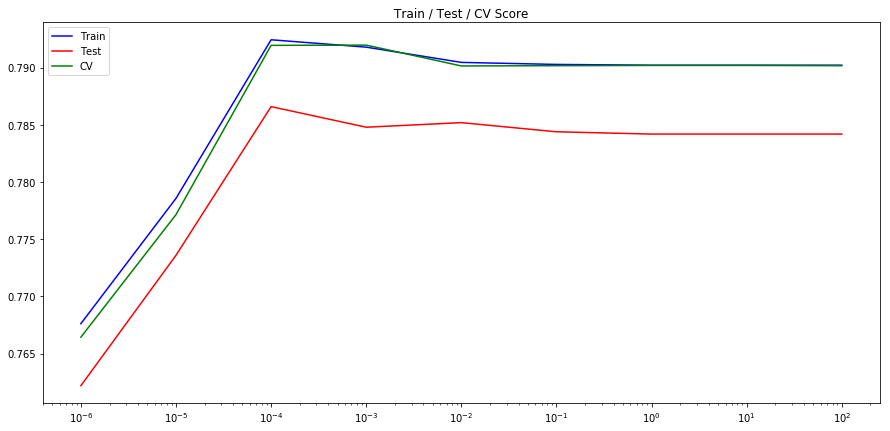

In [36]:
params = np.logspace(-6,2,9)
train_score = []
test_score = []
cv_score = []

for param in params:
    model = LogisticRegression(C=param, solver='lbfgs')
    model.fit(X_train, y_train)
    train_score.append(model.score(X_train, y_train))
    test_score.append(model.score(X_test, y_test))
    cv_score.append(cross_val_score(model, X_train, y_train, cv=5).mean())

plt.subplots(figsize=(15,7))
plt.plot(params, train_score, color='blue', label='Train')
plt.plot(params, test_score, color='red', label='Test')
plt.plot(params, cv_score, color='green', label='CV')
plt.xscale('log')
plt.title("Train / Test / CV Score")
plt.legend()